In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv(r"C:\Users\fisay\OneDrive\Dokumente\Desktop\Copy of laptop_dataset(1).csv")

In [3]:
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [4]:
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [5]:
df.columns

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')

### 1. What are the top 5 most popular (most common) laptop brands in this dataset?

In [6]:
df['Brand'].value_counts().head(5)

Brand
Apple        1262
HP           1208
MSI          1190
Microsoft    1175
Dell         1170
Name: count, dtype: int64

### 2. How does the average price of laptops compare across different brands?


In [16]:
print('\n--- 2. Average Price per Brand ---')
avg_price_brand = df.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_brand.to_string())


--- 2. Average Price per Brand ---
Brand
Apple        2915.364279
Razer        2695.213804
MSI          2517.552227
Lenovo       1978.465790
Microsoft    1975.203549
Dell         1972.270222
Samsung      1959.007248
HP           1938.518733
Asus         1927.315142
Acer         1914.108515


### 3. What is the relationship between the type of processor (like Intel i9, AMD Ryzen 7) and the average price of a laptop?


In [17]:
print('\n--- 3. Average Price by Processor Type ---')
avg_price_processor = df.groupby('Processor')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_processor.to_string())


--- 3. Average Price by Processor Type ---
Processor
Intel i9       3084.511834
AMD Ryzen 9    3067.286753
Intel i7       2300.938979
AMD Ryzen 7    2277.774418
AMD Ryzen 5    1862.017925
Intel i5       1829.125983
Intel i3       1555.673013
AMD Ryzen 3    1534.919567


### 4. What is the distribution of laptops across different operating systems (like Windows, macOS, Linux)?


In [18]:
print('\n--- 4. Distribution Across Operating Systems ---')
os_counts = df['Operating System'].value_counts()
print(os_counts.to_string())


--- 4. Distribution Across Operating Systems ---
Operating System
Windows    2954
FreeDOS    2952
Linux      2946
macOS      2916


### 5. How does the screen resolution of a laptop affect its average price?


In [14]:
df.groupby('Resolution')['Price ($)'].mean().sort_values(ascending=False)

Resolution
3840x2160    3017.422036
2560x1440    2294.514609
1920x1080    1878.658218
1366x768     1530.799253
Name: Price ($), dtype: float64

### 6. Is there a connection between the amount of RAM (in GB) in a laptop and its price?

In [15]:
df.groupby('RAM (GB)')['Price ($)'].mean()

RAM (GB)
4     1387.705468
8     1551.721969
16    1855.332740
32    2486.663017
64    3625.575197
Name: Price ($), dtype: float64

### 7. What is the overall average price of laptops in this dataset?


In [19]:
df['Price ($)'].mean()

2183.57160774983

### 8. What is the overall average battery life (in hours) for these laptops?


In [20]:
df['Battery Life (hours)'].mean()

8.027855200543849

### 9. How does average battery life vary with different screen sizes?


In [21]:
df.groupby('Screen Size (inch)')['Battery Life (hours)'].mean()

Screen Size (inch)
13.3    8.048002
14.0    7.956324
15.6    8.042514
16.0    8.027724
17.3    8.067481
Name: Battery Life (hours), dtype: float64

### 10. What is the distribution of laptop weights (kg) in this dataset?


In [22]:
df['Weight (kg)'].describe()

count    11768.000000
mean         2.341117
std          0.667921
min          1.200000
25%          1.760000
50%          2.340000
75%          2.910000
max          3.500000
Name: Weight (kg), dtype: float64

### Histogram of laptop weights

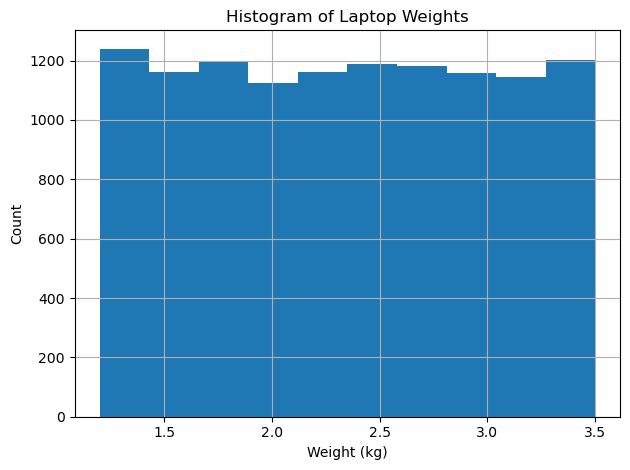

In [25]:
plt.figure()
df['Weight (kg)'].hist(bins=10)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title('Histogram of Laptop Weights')
plt.tight_layout()
plt.show()

### 11. How does the type of GPU (Graphics Processing Unit) influence the average price of a laptop?


In [23]:
print('\n--- 11. Average Price by GPU ---')
avg_price_gpu = df.groupby('GPU')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_gpu.to_string())


--- 11. Average Price by GPU ---
GPU
Nvidia RTX 3060       2337.062001
AMD Radeon RX 6800    2319.744506
AMD Radeon RX 6600    2290.889069
Nvidia GTX 1650       2290.877444
Nvidia RTX 2060       2273.021833
Nvidia RTX 3080       2259.618349
Integrated            1500.884743


### 12. For a specific operating system (e.g., "Windows"), what is the average price of laptops with different screen resolutions?


In [24]:
print('\n--- 12. Average Price by Resolution for Windows Laptops ---')
windows_df = df[df['Operating System'] == 'Windows']
avg_price_windows_resolution = windows_df.groupby('Resolution')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_windows_resolution.to_string())


--- 12. Average Price by Resolution for Windows Laptops ---
Resolution
3840x2160    3006.967253
2560x1440    2312.928245
1920x1080    1874.140408
1366x768     1515.652545


### 13. Is there a correlation between a laptop's weight and its screen size?


In [26]:
print('\n--- 13. Correlation between Weight and Screen Size ---')
weight_screen_corr = df['Weight (kg)'].corr(df['Screen Size (inch)'])
print(f'{weight_screen_corr:.3f}')


--- 13. Correlation between Weight and Screen Size ---
-0.016


### 14. Which storage type and capacity (e.g., 512GB SSD, 1TB HDD) is associated with the highest average price?


In [27]:
print('\n--- 14. Storage Type/Capacity with Highest Average Price ---')
avg_price_storage = df.groupby('Storage')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_storage.to_string())
print(f'Highest average price: {avg_price_storage.idxmax()} -> ${avg_price_storage.max():.2f}')


--- 14. Storage Type/Capacity with Highest Average Price ---
Storage
1TB SSD      2289.761842
256GB SSD    2272.901890
512GB SSD    2231.923822
2TB SSD      2209.042145
1TB HDD      1909.371212
Highest average price: 1TB SSD -> $2289.76


### 15. What is the total sales value represented in this dataset?


In [28]:
print('\n--- 15. Total Sales Value (Sum of Listed Prices) ---')
total_sales_value = df['Price ($)'].sum()
print(f'${total_sales_value:,.2f}')


--- 15. Total Sales Value (Sum of Listed Prices) ---
$25,696,270.68


### 16. How many total laptops are included in this dataset?

In [29]:
print('\n--- 16. Total Number of Laptops ---')
total_laptops = len(df)
print(total_laptops)


--- 16. Total Number of Laptops ---
11768
